Código desenvolvido pela equipe:
- Caíque Santos
- Fábio Reis
- Ismael Alves
- Marcos Vinicius da Silva

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [5]:
df = pd.read_csv('dataset_spotify_tracks.csv', index_col=0)
df.drop_duplicates(subset=['track_name'], inplace=True)

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Descrição das colunas
- track_id: O ID do Spotify para os artistas da faixa: Os nomes dos artistas que apresentaram a faixa. Se houver mais de um artista, eles são separados por a;
- album_name: O nome do álbum no qual a faixa aparece
- track_name: Nome da faixa
- popularity: A popularidade de uma faixa é um valor entre 0 e 100, sendo 100 o mais popular. A popularidade é calculada por algoritmo e é baseada, em grande parte, no número total de reproduções que a faixa teve e quão recentes são essas reproduções. De um modo geral, as músicas que estão sendo muito tocadas agora terão uma popularidade maior do que as músicas que eram muito tocadas no passado. Faixas duplicadas (por exemplo, a mesma faixa de um single e um álbum) são classificadas de forma independente. A popularidade do artista e do álbum é derivada matematicamente da popularidade da faixa.
- duration_ms: A duração da trilha em milissegundos
- explicit: Se a faixa tem ou não letras explícitas (verdadeiro = sim, tem; falso = não, não tem OU desconhecido)
- danceability: Danceability descreve o quanto uma faixa é adequada para dançar com base em uma combinação de elementos musicais, incluindo andamento, estabilidade do ritmo, força da batida e regularidade geral. Um valor de 0,0 é menos dançável e 1,0 é o mais dançável
- energy: A energia é uma medida de 0,0 a 1,0 e representa uma medida perceptiva de intensidade e atividade. Normalmente, as faixas energéticas parecem rápidas, altas e barulhentas. Por exemplo, death metal tem alta energia, enquanto um prelúdio de Bach pontua baixo na escala
- key: O tom em que a faixa está. Os inteiros são mapeados para as notas usando a notação padrão de Classe de Pitch. Por exemplo. 0 = C, 1 = C♯/D♭, 2 = D e assim por diante. Se nenhuma chave foi detectada, o valor é -1
- loudness: o volume geral de uma faixa em decibéis (dB)
- mode: Mode indica a modalidade (maior ou menor) de uma faixa, o tipo de escala da qual deriva seu conteúdo melódico. Maior é representado por 1 e menor é 0
- Speechiness: Speechiness detecta a presença de palavras faladas em uma faixa. Quanto mais exclusivamente semelhante à fala for a gravação (por exemplo, talk show, livro de áudio, poesia), mais próximo de 1,0 será o valor do atributo. Valores acima de 0,66 descrevem faixas que provavelmente são feitas inteiramente de palavras faladas. Valores entre 0,33 e 0,66 descrevem faixas que podem conter música e fala, seja em seções ou em camadas, incluindo casos como rap. Valores abaixo de 0,33 provavelmente representam música e outras faixas não semelhantes à fala
- acousticness: Uma medida de confiança de 0,0 a 1,0 se a faixa é acústica. 1.0 representa alta confiança de que a faixa é acústica
- instrumentalidade: prevê se uma faixa não contém vocais. Os sons "Ooh" e "aah" são tratados como instrumentais neste contexto. Faixas de rap ou palavras faladas são claramente "vocais". Quanto mais próximo o valor da instrumentalidade estiver de 1,0, maior a probabilidade de a faixa não conter nenhum conteúdo vocal
- liveness: Detecta a presença de uma audiência na gravação. Valores mais altos de vivacidade representam uma probabilidade maior de que a faixa tenha sido tocada ao vivo. Um valor acima de 0,8 fornece uma forte probabilidade de que a faixa esteja ativa
- valence: Uma medida de 0,0 a 1,0 que descreve a positividade musical transmitida por uma faixa. Faixas com alta valência soam mais positivas (por exemplo, feliz, alegre, eufórica), enquanto faixas com baixa valência soam mais negativas (por exemplo, triste, deprimido, zangado)
- tempo: O andamento geral estimado de uma faixa em batidas por minuto (BPM). Na terminologia musical, tempo é a velocidade ou ritmo de uma determinada peça e deriva diretamente da duração média da batida
- time_signature: Uma fórmula de compasso estimada. A fórmula de compasso (medidor) é uma convenção de notação para especificar quantas batidas há em cada compasso (ou compasso). A fórmula de compasso varia de 3 a 7, indicando fórmulas de compasso de 3/4 a 7/4.
- track_genre: O gênero ao qual a faixa pertence

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39346 entries, 0 to 53786
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   track_id          39346 non-null  object  
 1   artists           39346 non-null  object  
 2   album_name        39346 non-null  object  
 3   track_name        39345 non-null  object  
 4   popularity        39345 non-null  float64 
 5   duration_ms       39345 non-null  float64 
 6   explicit          39345 non-null  object  
 7   danceability      39345 non-null  float64 
 8   energy            39345 non-null  float64 
 9   key               39345 non-null  float64 
 10  loudness          39345 non-null  float64 
 11  mode              39345 non-null  float64 
 12  speechiness       39345 non-null  float64 
 13  acousticness      39345 non-null  float64 
 14  instrumentalness  39345 non-null  float64 
 15  liveness          39345 non-null  float64 
 16  valence           3934

# Número de Músicas por Gênero

In [ ]:
n_track_genre = df['track_genre'].value_counts()

In [ ]:
n_track_genre.iloc[:20]

black-metal       981
comedy            965
afrobeat          945
heavy-metal       944
cantopop          935
bluegrass         930
forro             925
anime             925
grindcore         924
chicago-house     916
breakbeat         914
acoustic          911
brazil            908
ambient           896
disney            895
happy             882
club              871
detroit-techno    861
death-metal       825
chill             821
Name: track_genre, dtype: int64

## Popularidade x Gênero

In [ ]:
plot1 = df[['track_genre','popularity']].groupby('track_genre').mean().sort_values(by='popularity', ascending=True)

In [ ]:
plot1

,popularity
track_genre,
detroit-techno,11.263647
chicago-house,12.046943
grindcore,14.542208
classical,14.618792
honky-tonk,16.000000
breakbeat,20.028446
happy,21.598639
black-metal,22.408767
comedy,24.574093


In [ ]:
px.bar(plot1, title='Indice de Popularidade de cada gênero')

## Danceabilidade e Positividade x Gênero

In [ ]:
plot2 = df[['track_genre','danceability', 'valence']].groupby('track_genre').mean().sort_values(by='danceability', ascending=False)

In [ ]:
plot2

,danceability,valence
track_genre,,
chicago-house,0.767207,0.590357
funk,0.726617,0.616483
dancehall,0.726084,0.635886
detroit-techno,0.723597,0.465280
children,0.714034,0.687449
hip-hop,0.710881,0.548019
house,0.710603,0.481197
deep-house,0.708908,0.438580
dance,0.682253,0.523433


In [ ]:
import plotly.graph_objects as go

fig = go.Figure(data=[
    go.Bar(x = plot2.index, y = plot2['danceability'].values, name='danceability'),
    go.Bar(x = plot2.index, y = plot2['valence'].values, name='valence')
])

fig.show()

## Top 10 músicas mais populares (do momento)



In [ ]:
top10 = df.sort_values(by='popularity', ascending=False).head(10)

In [ ]:
top10[['artists','track_name','popularity', 'track_genre']]

,artists,track_name,popularity,track_genre
20001,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),100.0,dance
51664,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52",99.0,hip-hop
20008,David Guetta;Bebe Rexha,I'm Good (Blue),98.0,dance
2003,The Neighbourhood,Sweater Weather,93.0,alt-rock
15013,Tom Odell,Another Love,93.0,chill
20850,Beyoncé,CUFF IT,93.0,dance
20017,Charlie Puth;Jung Kook;BTS,Left and Right (Feat. Jung Kook of BTS),92.0,dance
38000,Arctic Monkeys,I Wanna Be Yours,92.0,garage
20410,Nicki Minaj,Super Freaky Girl,92.0,dance
51203,Drake;21 Savage,Jimmy Cooks (feat. 21 Savage),91.0,hip-hop


## Correlações

In [ ]:
corr = df.copy()

In [ ]:
data = corr.corr(method='pearson')

In [ ]:
data

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
popularity,1.000000,-0.085537,0.070131,-0.074721,-0.007303,0.080000,-0.026969,-0.067245,0.029481,-0.202206,-0.070255,-0.008938,-0.019839,0.034069
duration_ms,-0.085537,1.000000,-0.027777,0.081291,0.017136,0.028350,-0.041792,-0.043163,-0.132991,0.086673,0.013063,-0.111453,0.036474,0.029588
danceability,0.070131,-0.027777,1.000000,0.013195,0.032697,0.144613,-0.065334,0.079890,-0.061045,-0.186098,-0.128621,0.488051,-0.076309,0.162427
energy,-0.074721,0.081291,0.013195,1.000000,0.043989,0.776607,-0.101461,0.138726,-0.737846,-0.136174,0.199659,0.144170,0.245749,0.139391
key,-0.007303,0.017136,0.032697,0.043989,1.000000,0.033962,-0.161273,0.007382,-0.045167,0.001949,-0.008043,0.029166,0.001685,0.012241
loudness,0.080000,0.028350,0.144613,0.776607,0.033962,1.000000,-0.058814,0.029262,-0.607466,-0.387107,0.096433,0.176388,0.215579,0.161855
mode,-0.026969,-0.041792,-0.065334,-0.101461,-0.161273,-0.058814,1.000000,-0.030183,0.127538,-0.048418,0.017050,0.017976,-0.013536,-0.028896
speechiness,-0.067245,-0.043163,0.079890,0.138726,0.007382,0.029262,-0.030183,1.000000,0.099179,-0.132842,0.356902,0.010220,-0.064139,-0.069677
acousticness,0.029481,-0.132991,-0.061045,-0.737846,-0.045167,-0.607466,0.127538,0.099179,1.000000,0.058603,-0.006979,-0.037446,-0.222407,-0.168882
instrumentalness,-0.202206,0.086673,-0.186098,-0.136174,0.001949,-0.387107,-0.048418,-0.132842,0.058603,1.000000,-0.116656,-0.266570,-0.024132,-0.066254


<AxesSubplot:>

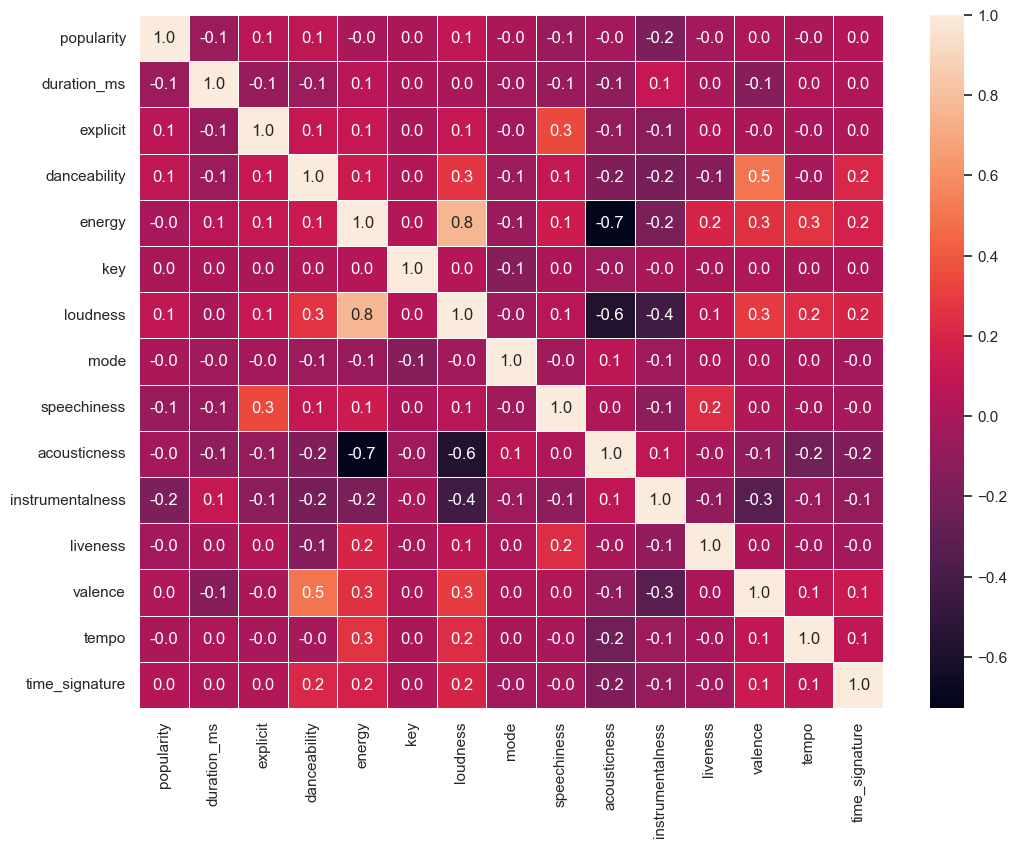

In [ ]:
sns.set(rc={'figure.figsize':(12,9)})
plot = sns.heatmap(data, annot = True, fmt=".1f", linewidths=.6)
plot

## Gêneros com o popularidade mais estável?

In [ ]:
generos = df.groupby('track_genre')[['popularity']]

In [ ]:
generos.describe()

popularity                                                 \
                    count       mean        std   min   25%   50%    75%   
track_genre                                                                
acoustic            911.0  43.245884  15.207536   0.0  30.0  47.0  54.00   
afrobeat            945.0  24.590476  10.414427   0.0  18.0  21.0  29.00   
alt-rock            777.0  38.803089  29.735364   0.0   0.0  46.0  66.00   
alternative         224.0  35.870536  33.745636   0.0   0.0  42.0  68.00   
ambient             896.0  44.928571  17.311521   0.0  40.0  50.0  55.00   
anime               925.0  48.736216  11.901910   0.0  43.0  50.0  57.00   
black-metal         981.0  22.408767   9.370551   0.0  17.0  19.0  22.00   
bluegrass           930.0  25.743011   7.491479   0.0  22.0  24.0  27.00   
blues               650.0  39.160000  24.148021   0.0  32.0  38.0  59.75   
brazil              908.0  44.794053   9.016614   0.0  44.0  45.0  47.00   
breakbeat           914.0  20.028446  12.733999   0.0  12.0  14.0  21.00   
british             802.0  44.583541  22.102330   0.0  29.0  52.0  60.00   
cantopop            935.0  34.813904  13.676032   0.0  22.0  35.0  47.00   
chicago-house       916.0  12.046943   9.133077   0.0   7.0   9.5  14.00   
children            774.0  34.502584  16.520617   0.0  28.0  33.0  47.00   
chill               821.0  55.297199  11.882939   0.0  52.0  57.0  61.00   
classical           745.0  14.618792  18.155679   0.0   0.0   5.0  30.00   
club                871.0  33.202067  13.569508   0.0  18.0  37.0  44.00   
comedy              965.0  24.574093   7.349736  19.0  21.0  23.0  25.00   
country             507.0  25.193294  28.833139   0.0   0.0   1.0  47.00   
dance               396.0  36.623737  38.313726   0.0   0.0   4.0  77.00   
dancehall           778.0  36.133676  18.813455   0.0  26.0  33.0  53.00   
death-metal         825.0  31.958788  13.928937   0.0  22.0  25.0  46.00   
deep-house          765.0  45.920261  17.489269   0.0  42.0  51.0  57.00   
detroit-techno      861.0  11.263647   9.173594   0.0   6.0   8.0  12.00   
disco               712.0  33.832865  22.682022   0.0  29.0  32.0  53.00   
disney              895.0  27.344134  11.840382   0.0  20.0  23.0  30.00   
drum-and-bass       773.0  26.240621  14.161323   0.0  17.0  19.0  36.00   
dub                 727.0  40.061898  14.451792   0.0  29.0  44.0  50.00   
dubstep             205.0  39.487805   7.502032   0.0  36.0  40.0  44.00   
edm                 416.0  48.954327  27.245609   0.0  43.0  60.0  68.00   
electro             323.0  46.111455  31.730033   0.0   1.0  63.0  71.00   
electronic          713.0  44.145863  14.299703   0.0  36.0  45.0  55.00   
emo                 776.0  49.282216  15.047932   0.0  37.0  50.0  60.00   
folk                674.0  42.545994  17.736350   0.0  35.0  43.0  52.00   
forro               925.0  41.990270   4.182642  36.0  39.0  41.0  44.00   
french              755.0  40.043709  16.700099   0.0  32.0  35.0  54.00   
funk                585.0  41.011966  19.517858   0.0  42.0  45.0  48.00   
garage              763.0  40.774574  16.727679   0.0  26.0  32.0  56.00   
german              584.0  35.690068  18.911861   0.0  27.0  39.0  43.00   
gospel              621.0  39.713366   2.266509   0.0  38.0  40.0  41.00   
goth                807.0  28.696406  10.628548   0.0  22.0  24.0  31.50   
grindcore           924.0  14.542208   4.312213   0.0  12.0  14.0  16.00   
groove              527.0  35.571157  15.182858   0.0  26.0  32.0  47.00   
grunge              597.0  49.763819  14.922490   0.0  41.0  54.0  60.00   
guitar              771.0  28.867704   9.932271   0.0  22.0  25.0  33.00   
happy               882.0  21.598639  10.801265   0.0  17.0  19.0  24.00   
hard-rock           562.0  46.097865  19.711630   0.0  36.0  40.0  63.00   
hardcore            659.0  37.119879  18.467730   0.0  30.0  32.0  54.00   
hardstyle           763.0  27.809961  13.200525   0.0  21.0  23

In [ ]:
generos.mean().sort_values(by='popularity', ascending=False)

,popularity
track_genre,
chill,55.297199
hip-hop,52.670511
grunge,49.763819
emo,49.282216
edm,48.954327
anime,48.736216
house,46.857143
electro,46.111455
hard-rock,46.097865


In [ ]:
generos.std().sort_values(by='popularity', ascending=False)

,popularity
track_genre,
dance,38.313726
alternative,33.745636
house,31.804269
electro,31.730033
alt-rock,29.735364
country,28.833139
edm,27.245609
hip-hop,25.929013
blues,24.148021


In [ ]:
genre_gospel_dance = df.query("track_genre == 'gospel' or track_genre == 'dance'")

In [ ]:
medias = genre_gospel_dance[['track_genre','popularity']].groupby('track_genre').mean().sort_values(by='popularity', ascending=True)

In [ ]:
fig = go.Figure(data=[
    go.Scatter(x = genre_gospel_dance['track_genre'], y = genre_gospel_dance['popularity'].values, name='Valores', mode='markers'),
    go.Scatter(x = medias.index, y = medias['popularity'].values, name='Média', mode='markers')
])

fig.update_layout(
    autosize=False,
    width=500,
    height=800,
)

fig.show()

In [ ]:
plot3 = df[['track_genre','acousticness', 'energy']].groupby('track_genre').mean().sort_values(by='track_genre', ascending=True)
plot3

,acousticness,energy
track_genre,,
acoustic,0.560410,0.440125
afrobeat,0.266777,0.701550
alt-rock,0.133773,0.743139
alternative,0.182775,0.691076
ambient,0.776316,0.235214
anime,0.275179,0.668116
black-metal,0.027098,0.875207
bluegrass,0.558480,0.532006
blues,0.323612,0.596936


In [ ]:
fig = go.Figure(data=[
    go.Bar(x = plot3.index, y = plot3['acousticness'], name='acousticness'),
    go.Bar(x = plot3.index, y = plot3['energy'], name='energy')
])

fig.show();

## Popularidade por faixa de tempo de música?

In [ ]:
df['duracao_minuto'] = df['duration_ms']/60000
classe = [0,2,7,10,20,100]
labels = ["0-2min","2-7min","7-10min","10-20min","20-100min"]
classes = pd.cut(x=df.duracao_minuto, bins=classe, labels=labels)

df['faixa'] = classes

df.pivot_table(index ='faixa',columns = None, values='popularity',aggfunc='mean').sort_values(by = 'popularity' , ascending = False)

,popularity
faixa,
2-7min,34.889744
0-2min,28.914544
7-10min,24.598519
20-100min,23.952381
10-20min,23.811189


## Top 10 Instrumentalidade por musica

In [ ]:
df.pivot_table(index=['track_name','artists'], columns = None, values = 'instrumentalness',).sort_values(by = 'instrumentalness' , ascending = False).head(10)

,,instrumentalness
track_name,artists,
Empire of Bone,Dropdead,0.995
The Enemy Within (Part Two),Dropdead,0.995
Nosara,Little Symphony,0.995
Wet Rocks,Lorne Balfe,0.995
Ionian,Little Symphony,0.993
Wicked Fields of Calm,Leviathan,0.993
Campomoro,Little Symphony,0.991
Untitled,Jarhead Fertilizer;Purge,0.991
Arob,Little Symphony,0.991


##Top Músicas Anitta


In [ ]:
plot4 = df.loc[df['artists']=='Anitta']


In [ ]:
plot4.pivot_table(index = 'track_name', columns = None, values = 'popularity').sort_values('popularity',ascending=False).head(10)

,popularity
track_name,
Pantera,3.0
Boys Don't Cry,2.0
Envolver,0.0
